In [16]:
from sfa import SparseFactorAnalyzer
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics

from numpy import corrcoef
from scipy.spatial import distance
from scipy import sparse

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
data_path = 'data/variance_stabilized.csv'
pheno_path = 'data/phenotype.csv'
data = pd.read_csv(data_path, index_col=0)
phenotype = pd.read_csv(pheno_path, index_col=0)

In [4]:
np.random.seed(121)
phenotype20 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.2))
phenotype40 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.4))
phenotype60 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.6))
phenotype80 = phenotype.groupby('DAY').apply(lambda x: x.sample(frac=0.8))
phenotype100 = phenotype

In [5]:
sfa20 = pickle.load(open('output/sfa20', 'rb'))
sfa40 = pickle.load(open('output/sfa40', 'rb'))
sfa60 = pickle.load(open('output/sfa60', 'rb'))
sfa80 = pickle.load(open('output/sfa80', 'rb'))
sfa100 = pickle.load(open('output/sfa100', 'rb'))

In [6]:
ssfa20 = pickle.load(open('output/ssfa20', 'rb'))
ssfa40 = pickle.load(open('output/ssfa40', 'rb'))
ssfa60 = pickle.load(open('output/ssfa60', 'rb'))
ssfa80 = pickle.load(open('output/ssfa80', 'rb'))
ssfa100 = pickle.load(open('output/ssfa100', 'rb'))

In [7]:
def sparsity(sfa):
    return 1.0 * (~np.isclose(sfa.Lambda, 0)).sum() / sfa.Lambda.size

def make_clustering(sfa):
    """
    makes a clustering from the loadings by placing a gene the cluster K
    corresponding to the component with greatest magnitude
    """
    return np.abs(sfa.Lambda).argmax(axis=1)
    

(array([  2.70000000e+01,   1.05000000e+02,   3.30000000e+02,
          5.43000000e+02,   7.60000000e+02,   1.01300000e+03,
          1.62000000e+02,   5.10000000e+01,   8.00000000e+00,
          1.00000000e+00]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ]),
 <a list of 10 Patch objects>)

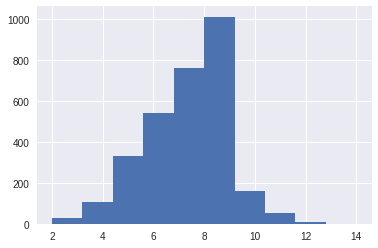

In [9]:
plt.hist((sfa20.Lambda != 0).sum(axis=1))

(array([ 1.,  0.,  1.,  2.,  1.,  5.,  9.,  3.,  3.,  5.]),
 array([ 1089. ,  1138.9,  1188.8,  1238.7,  1288.6,  1338.5,  1388.4,
         1438.3,  1488.2,  1538.1,  1588. ]),
 <a list of 10 Patch objects>)

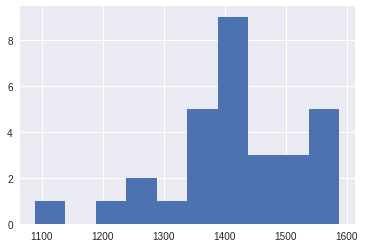

In [10]:
plt.hist((sfa100.Lambda != 0).sum(axis=0))

In [12]:
def compute_HammingDistance(X, Y):
    Z = np.hstack([X, Y]).T
    return (Z[:, None, :] != Z).sum(2)

def compute_ANDDistance(X, Y):
    return np.dot((X.T != 0).astype(np.float64), (Y != 0).astype(np.float64))

def compute_YuleDissimilarity(X, Y):
    yule = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            yule[i, j] = distance.yule((X[i] != 0), Y[j] != 0)
    
    return yule

In [13]:
YY = compute_HammingDistance(sfa20.Lambda, sfa100.Lambda)

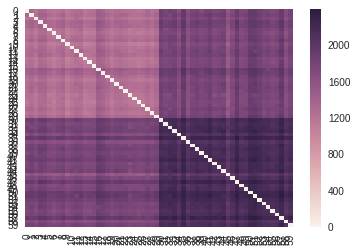

In [14]:
sns.heatmap(YY)

In [18]:
X20 = sparse.random(3000, 500, 0.25)
X40 = sparse.random(3000, 500, 0.35)
X60 = sparse.random(3000, 500, 0.40)
X80 = sparse.random(3000, 500, 0.45)
X100 = sparse.random(3000, 500, 0.45)

In [42]:
X20100 = compute_HammingDistance(X20.A, X100.A)[500:, :500]
X40100 = compute_HammingDistance(X40.A, X100.A)[500:, :500]
X60100 = compute_HammingDistance(X60.A, X100.A)[500:, :500]
X80100 = compute_HammingDistance(X80.A, X100.A)[500:, :500]


In [43]:
sfa20_100hamming = compute_HammingDistance(sfa20.Lambda, sfa100.Lambda)[:30, 30:]
ssfa20_100hamming = compute_HammingDistance(ssfa20.Lambda, ssfa100.Lambda)[:30, 30:]

sfa40_100hamming = compute_HammingDistance(sfa40.Lambda, sfa100.Lambda)[:30, 30:]
ssfa40_100hamming = compute_HammingDistance(ssfa40.Lambda, ssfa100.Lambda)[:30, 30:]

sfa60_100hamming = compute_HammingDistance(sfa60.Lambda, sfa100.Lambda)[:30, 30:]
ssfa60_100hamming = compute_HammingDistance(ssfa60.Lambda, ssfa100.Lambda)[:30, 30:]

sfa80_100hamming = compute_HammingDistance(sfa80.Lambda, sfa100.Lambda)[:30, 30:]
ssfa80_100hamming = compute_HammingDistance(ssfa80.Lambda, ssfa100.Lambda)[:30, 30:]

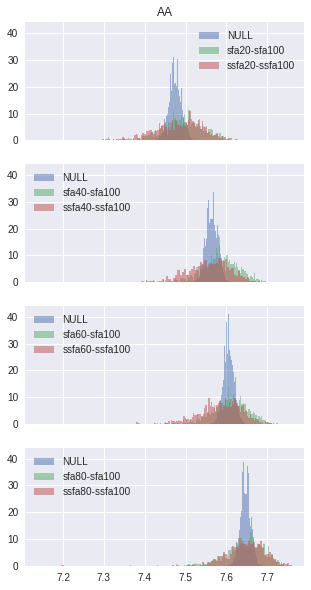

In [49]:
fig, ax = plt.subplots(4, sharex=True, sharey=True, figsize=(5, 10))

ax[0].hist(np.log(X20100.flatten()), bins=100, normed=True, alpha=0.5, label='NULL')
ax[0].hist(np.log(sfa20_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='sfa20-sfa100')
ax[0].hist(np.log(ssfa20_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='ssfa20-ssfa100')
ax[0].legend()
ax[0].set_title('20-100')

ax[1].hist(np.log(X40100.flatten()), bins=100, normed=True, alpha=0.5, label='NULL')
ax[1].hist(np.log(sfa40_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='sfa40-sfa100')
ax[1].hist(np.log(ssfa40_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='ssfa40-ssfa100')
ax[1].legend()

ax[2].hist(np.log(X60100.flatten()), bins=100, normed=True, alpha=0.5, label='NULL')
ax[2].hist(np.log(sfa60_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='sfa60-sfa100')
ax[2].hist(np.log(ssfa60_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='ssfa60-ssfa100')
ax[2].legend()

ax[3].hist(np.log(X80100.flatten()), bins=100, normed=True, alpha=0.5, label='NULL')
ax[3].hist(np.log(sfa80_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='sfa80-sfa100')
ax[3].hist(np.log(ssfa80_100hamming.flatten()), bins=100, normed=True, alpha=0.5, label='ssfa80-ssfa100')
ax[3].legend()

plt.show()

In [87]:
sfa_models = {'sfa20': sfa20, 'sfa40': sfa40, 'sfa60': sfa60, 'sfa80': sfa80, 'sfa100': sfa100}
ssfa_models = {'ssfa20': ssfa20, 'ssfa40': ssfa40, 'ssfa60': ssfa60, 'ssfa80': ssfa80, 'ssfa100': ssfa100}

In [90]:
sfa_mutual_information_scores = pd.DataFrame(columns=sfa_models.keys(), index=sfa_models.keys(), dtype=np.float64)
ssfa_mutual_information_scores = pd.DataFrame(columns=ssfa_models.keys(), index=ssfa_models.keys(), dtype=np.float64)

sfa_correlation = pd.DataFrame(columns=sfa_models.keys(), index=sfa_models.keys(), dtype=np.float64)
ssfa_correlation = pd.DataFrame(columns=ssfa_models.keys(), index=ssfa_models.keys(), dtype=np.float64)
for i in sfa_models:
    for j in sfa_models:
        sfa_mutual_information_scores.loc[i, j] = \
            metrics.normalized_mutual_info_score(
                make_clustering(sfa_models[i]),
                make_clustering(sfa_models[j])
            )
        sfa_correlation.loc[i, j] = np.abs(corrcoef(sfa_models[i].Lambda.T, sfa_models[j].Lambda.T))[:30, 30:].max(axis=0).mean()
            
for i in ssfa_models:
    for j in ssfa_models:
        ssfa_mutual_information_scores.loc[i, j] = \
            metrics.normalized_mutual_info_score(
                make_clustering(ssfa_models[i]),
                make_clustering(ssfa_models[j])
            )
        ssfa_correlation.loc[i, j] = np.abs(corrcoef(ssfa_models[i].Lambda.T, ssfa_models[j].Lambda.T))[:30, 30:].max(axis=0).mean()

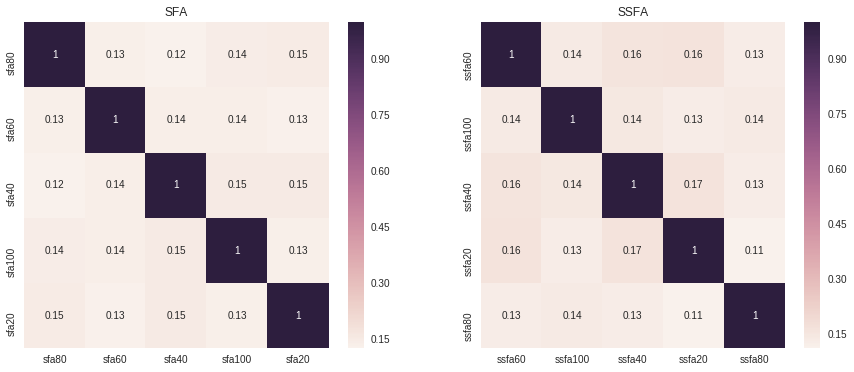

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(sfa_mutual_information_scores, ax=ax[0], annot=True)
ax[0].set_title('SFA')
sns.heatmap(ssfa_mutual_information_scores, ax=ax[1], annot=True)
ax[1].set_title('SSFA')
plt.savefig('sample_size_stability_mutual_info')

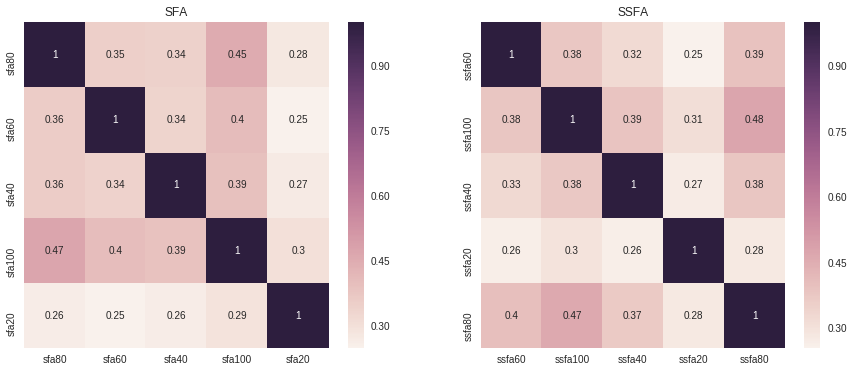

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(sfa_correlation, ax=ax[0], annot=True)
ax[0].set_title('SFA')
sns.heatmap(ssfa_correlation, ax=ax[1], annot=True)
ax[1].set_title('SSFA')
plt.savefig('sample_size_stability_correlation')